# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [2]:
# %pip install --upgrade plotly

### Import Statements

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [5]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [6]:
df_data.shape

(962, 16)

In [7]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [8]:
df_data

year    category                                           prize  \
0    1901   Chemistry               The Nobel Prize in Chemistry 1901   
1    1901  Literature              The Nobel Prize in Literature 1901   
2    1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3    1901       Peace                      The Nobel Peace Prize 1901   
4    1901       Peace                      The Nobel Peace Prize 1901   
..    ...         ...                                             ...   
957  2020    Medicine  The Nobel Prize in Physiology or Medicine 2020   
958  2020       Peace                      The Nobel Peace Prize 2020   
959  2020     Physics                 The Nobel Prize in Physics 2020   
960  2020     Physics                 The Nobel Prize in Physics 2020   
961  2020     Physics                 The Nobel Prize in Physics 2020   

                                            motivation prize_share  \
0    "in recognition of the extraordinary services ...         1/1   
1    "in special recognition of his poetic composit...         1/1   
2    "for his work on serum therapy, especially its...         1/1   
3                                                  NaN         1/2   
4                                                  NaN         1/2   
..                                                 ...         ...   
957           “for the discovery of Hepatitis C virus”         1/3   
958  “for its efforts to combat hunger, for its con...         1/1   
959  “for the discovery of a supermassive compact o...         1/4   
960  “for the discovery of a supermassive compact o...         1/4   
961  “for the discovery that black hole formation i...         1/2   

    laureate_type                     full_name  birth_date  \
0      Individual  Jacobus Henricus van 't Hoff  1852-08-30   
1      Individual               Sully Prudhomme  1839-03-16   
2      Individual        Emil Adolf von Behring  1854-03-15   
3      Individual                Frédéric Passy  1822-05-20   
4      Individual             Jean Henry Dunant  1828-05-08   
..            ...                           ...         ...   
957    Individual              Michael Houghton  1949-07-02   
958  Organization    World Food Programme (WFP)         NaN   
959    Individual                   Andrea Ghez  1965-06-16   
960    Individual               Reinhard Genzel  1952-03-24   
961    Individual                 Roger Penrose  1931-08-08   

                   birth_city             birth_country  \
0                   Rotterdam               Netherlands   
1                       Paris                    France   
2           Hansdorf (Lawice)          Prussia (Poland)   
3                       Paris                    France   
4                      Geneva               Switzerland   
..                        ...                       ...   
957                       NaN            United Kingdom   
958                       NaN                       NaN   
959              New York, NY  United States of America   
960  Bad Homburg vor der Höhe                   Germany   
961                Colchester            United Kingdom   

        birth_country_current     sex         organization_name  \
0                 Netherlands    Male         Berlin University   
1                      France    Male                       NaN   
2                      Poland    Male        Marburg University   
3                      France    Male                       NaN   
4                 Switzerland    Male                       NaN   
..                        ...     ...                       ...   
957            United Kingdom    Male     University of Alberta   
958                       NaN     NaN                       NaN   
959  United States of America  Female  University of California   
960                   Germany    Male  University of California   
961            United Kingdom    Male      University of Oxford   

    organization

In [9]:
#First year
df_data["year"].min()

1901

In [10]:
#latest year on data set
df_data["year"].max()

2020

**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [11]:
df_data.duplicated().values.any()

False

In [12]:
# df_data

### Check for NaN Values

In [13]:
df_data.isna().values.any()

True

In [14]:
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [15]:
df_data.head(2)

year    category                               prize  \
0  1901   Chemistry   The Nobel Prize in Chemistry 1901   
1  1901  Literature  The Nobel Prize in Literature 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   

  laureate_type                     full_name  birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff  1852-08-30  Rotterdam   
1    Individual               Sully Prudhomme  1839-03-16      Paris   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   
1        France                France  Male                NaN   

  organization_city organization_country  ISO  
0            Berlin              Germany  NLD  
1               NaN                  NaN  FRA

In [16]:
df_data.birth_date= pd.to_datetime(df_data["birth_date"])

In [17]:
# df_data.info()

In [18]:
x= df_data.prize_share.str.split("/", expand=True)

In [19]:
a= pd.to_numeric(x[0])

In [20]:
b= pd.to_numeric(x[1])

In [21]:
df_data["share_pct"]= a/b

In [22]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

#### Add a Column with the Prize Share as a Percentage

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [23]:
df_data.head(2)

year    category                               prize  \
0  1901   Chemistry   The Nobel Prize in Chemistry 1901   
1  1901  Literature  The Nobel Prize in Literature 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16      Paris   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   
1        France                France  Male                NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00  
1               NaN                  NaN  FRA       1.00

In [24]:
male= df_data[df_data.sex=="Male"]

In [25]:
female= df_data[df_data.sex=="Female"]

In [26]:
data= df_data["sex"].value_counts()

In [27]:
data

Male      876
Female     58
Name: sex, dtype: int64

In [28]:
import plotly.express as px
a= px.pie(data, values="sex", names=data.index, title="percentage of men vs women", hole=0.3 )
a.update_traces(textposition="inside", textinfo="percent")

# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [32]:
re_win= df_data[df_data["sex"]=="Female"].sort_values("year", ascending=False)

# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [33]:
df_data[df_data.duplicated(subset=["full_name"], keep=False)]

year   category                              prize  \
18   1903    Physics    The Nobel Prize in Physics 1903   
62   1911  Chemistry  The Nobel Prize in Chemistry 1911   
89   1917      Peace         The Nobel Peace Prize 1917   
215  1944      Peace         The Nobel Peace Prize 1944   
278  1954  Chemistry  The Nobel Prize in Chemistry 1954   
283  1954      Peace         The Nobel Peace Prize 1954   
297  1956    Physics    The Nobel Prize in Physics 1956   
306  1958  Chemistry  The Nobel Prize in Chemistry 1958   
340  1962      Peace         The Nobel Peace Prize 1962   
348  1963      Peace         The Nobel Peace Prize 1963   
424  1972    Physics    The Nobel Prize in Physics 1972   
505  1980  Chemistry  The Nobel Prize in Chemistry 1980   
523  1981      Peace         The Nobel Peace Prize 1981   

                                            motivation prize_share  \
18   "in recognition of the extraordinary services ...         1/4   
62   "in recognition of her services to the advance...         1/1   
89                                                 NaN         1/1   
215                                                NaN         1/1   
278  "for his research into the nature of the chemi...         1/1   
283                                                NaN         1/1   
297  "for their researches on semiconductors and th...         1/3   
306  "for his work on the structure of proteins, es...         1/1   
340                                                NaN         1/1   
348                                                NaN         1/2   
424  "for their jointly developed theory of superco...         1/3   
505  "for their contributions concerning the determ...         1/4   
523                                                NaN         1/1   

    laureate_type                                          full_name  \
18     Individual                        Marie Curie, née Sklodowska   
62     Individual                        Marie Curie, née Sklodowska   
89   Organization  Comité international de la Croix Rouge (Intern...   
215  Organization  Comité international de la Croix Rouge (Intern...   
278    Individual                                 Linus Carl Pauling   
283  Organization  Office of the United Nations High Commissioner...   
297    Individual                                       John Bardeen   
306    Individual                                   Frederick Sanger   
340    Individual                                 Linus Carl Pauling   
348  Organization  Comité international de la Croix Rouge (Intern...   
424    Individual                                       John Bardeen   
505    Individual                                   Frederick Sanger   
523  Organization  Office of the United Nations High Commissioner...   

    birth_date    birth_city             birth_country  \
18  1867-11-07        Warsaw   Russian Empire (Poland)   
62  1867-11-07        Warsaw   Russian Empire (Poland)   
89         NaT           NaN                       NaN   
215        NaT           NaN                       NaN   
278 1901-02-28  Portland, OR  United States of America   
283        NaT           NaN                       NaN   
297 1908-05-23   Madison, WI  United States of America   
306 1918-08-13     Rendcombe            United Kingdom   
340 1901-02-28  Portland, OR  United States of America   
348        NaT           NaN                       NaN   
424 1908-05-23   Madison, WI  United States of America   
505 1918-08-13     Rendcombe            United Kingdom   
523        NaT           NaN                       NaN   

        birth_country_current     sex  \
18                     Poland  Female   
62                     Poland  Female   
89                        NaN     NaN   
215                       NaN     NaN   
278  United States of America    Male   
283                       NaN     NaN   
297  United States of America    Male   
306            United Kingdom    Male   
340  U

In [34]:
col_set=["year", "category", "laureate_type", "full_name"]
re_win[col_set]

year    category laureate_type  \
959  2020     Physics    Individual   
954  2020  Literature    Individual   
951  2020   Chemistry    Individual   
950  2020   Chemistry    Individual   
940  2019   Economics    Individual   
934  2018     Physics    Individual   
932  2018       Peace    Individual   
928  2018  Literature    Individual   
923  2018   Chemistry    Individual   
896  2015    Medicine    Individual   
893  2015  Literature    Individual   
883  2014    Medicine    Individual   
885  2014       Peace    Individual   
869  2013  Literature    Individual   
849  2011       Peace    Individual   
848  2011       Peace    Individual   
847  2011       Peace    Individual   
823  2009    Medicine    Individual   
822  2009    Medicine    Individual   
821  2009  Literature    Individual   
819  2009   Economics    Individual   
816  2009   Chemistry    Individual   
809  2008    Medicine    Individual   
796  2007  Literature    Individual   
766  2004       Peace    Individual   
764  2004    Medicine    Individual   
763  2004  Literature    Individual   
754  2003       Peace    Individual   
683  1997       Peace    Individual   
667  1996  Literature    Individual   
655  1995    Medicine    Individual   
631  1993  Literature    Individual   
625  1992       Peace    Individual   
618  1991       Peace  Organization   
615  1991  Literature    Individual   
586  1988    Medicine    Individual   
565  1986    Medicine    Individual   
539  1983    Medicine    Individual   
534  1982       Peace    Individual   
501  1979       Peace  Organization   
478  1977    Medicine    Individual   
468  1976       Peace    Individual   
469  1976       Peace    Individual   
371  1966  Literature    Individual   
353  1964   Chemistry    Individual   
352  1963     Physics    Individual   
236  1947    Medicine    Individual   
229  1946       Peace    Individual   
218  1945  Literature    Individual   
198  1938  Literature    Individual   
179  1935   Chemistry    Individual   
160  1931       Peace    Individual   
141  1928  Literature    Individual   
128  1926  Literature    Individual   
62   1911   Chemistry    Individual   
51   1909  Literature    Individual   
29   1905       Peace    Individual   
18   1903     Physics    Individual   

                                             full_name  
959                                        Andrea Ghez  
954                                       Louise Glück  
951                                 Jennifer A. Doudna  
950                             Emmanuelle Charpentier  
940                                       Esther Duflo  
934                                   Donna Strickland  
932                                        Nadia Murad  
928                                     Olga Tokarczuk  
923                                  Frances H. Arnold  
896                                          Youyou Tu  
893                                Svetlana Alexievich  
883                                    May-Britt Moser  
885                                   Malala Yousafzai  
869                                        Alice Munro  
849                                    Tawakkol Karman  
848                                      Leymah Gbowee  
847                              Ellen Johnson Sirleaf  
823                             Elizabeth H. Blackburn  
822                                   Carol W. Greider  
821                                       Herta Müller  
819                                      Elinor Ostrom  
816                                      Ada E. Yonath  
809                           Françoise Barré-Sinoussi  
796                                      Doris Lessing  
766                               Wangari Muta Maathai  
764                                      Linda B. Buck  
763                                   Elfriede Jelinek  
754                                       Shirin Ebadi  
683                                      Jody Will

# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [35]:
cat_data= df_data.category.value_counts()

In [36]:
print(f"there are {df_data.category.nunique()} categories")

there are 6 categories


In [37]:
bar_gr= px.bar(x=cat_data.index, y=cat_data.values, color=cat_data.values, color_continuous_scale="Turbo")

bar_gr.update_layout(coloraxis_showscale=False, xaxis_title="Awards", yaxis_title="Category")

**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [38]:
df_data[df_data.category=="Economics"].sort_values("year")[:1]

year   category                                              prize  \
393  1969  Economics  The Sveriges Riksbank Prize in Economic Scienc...   

                                            motivation prize_share  \
393  "for having developed and applied dynamic mode...         1/2   

    laureate_type      full_name birth_date birth_city birth_country  \
393    Individual  Jan Tinbergen 1903-04-12  the Hague   Netherlands   

    birth_country_current   sex                    organization_name  \
393           Netherlands  Male  The Netherlands School of Economics   

    organization_city organization_country  ISO  share_pct  
393         Rotterdam          Netherlands  NLD       0.50

# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [39]:
cat= df_data.groupby(["category","sex"], as_index=False).agg({"prize": pd.Series.count})

In [40]:
cat[:1]

category     sex  prize
0  Chemistry  Female      7

In [41]:
bar= px.bar(cat, x="category", y="prize", color="sex", title="Number of Prizes Awarded per Category split by Men and Women")

bar.update_layout(xaxis_title="Nobel Prize Category", yaxis_title="Number of Prizes")

bar.show()

In [42]:
cat= cat.sort_values("prize", ascending=False)

In [43]:
bar= px.bar(cat, x="category", y="prize", color="sex", title="Number of Prizes Awarded per Category split by Men and Women")

bar.update_layout(xaxis_title="Nobel Prize Category", yaxis_title="Number of Prizes")

bar.show()

# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [44]:
yearly_prizes= df_data.groupby("year").count()

In [45]:
yearly_prizes= yearly_prizes.prize

In [46]:
# yearly_prizes

In [47]:
 avg= yearly_prizes.rolling(window=5)

In [48]:
avg= avg.mean()

In [49]:
# avg

In [50]:
import matplotlib.pyplot as plt

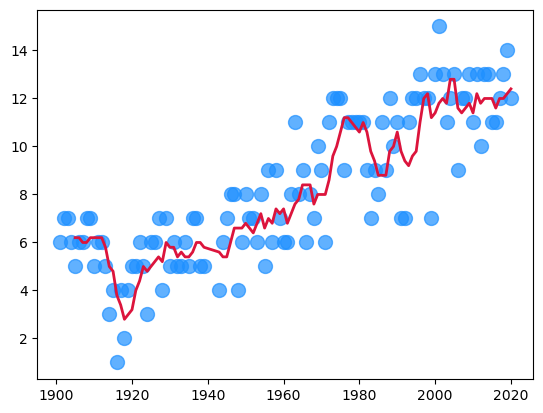

In [51]:
#year and prizes
plt.scatter(x=yearly_prizes.index, y=yearly_prizes.values, color="dodgerblue", alpha=0.7, s=100)

#year and prizes mean(avg for 5 years)
plt.plot(avg.index, avg.values, color="crimson", linewidth=2)

plt.show()

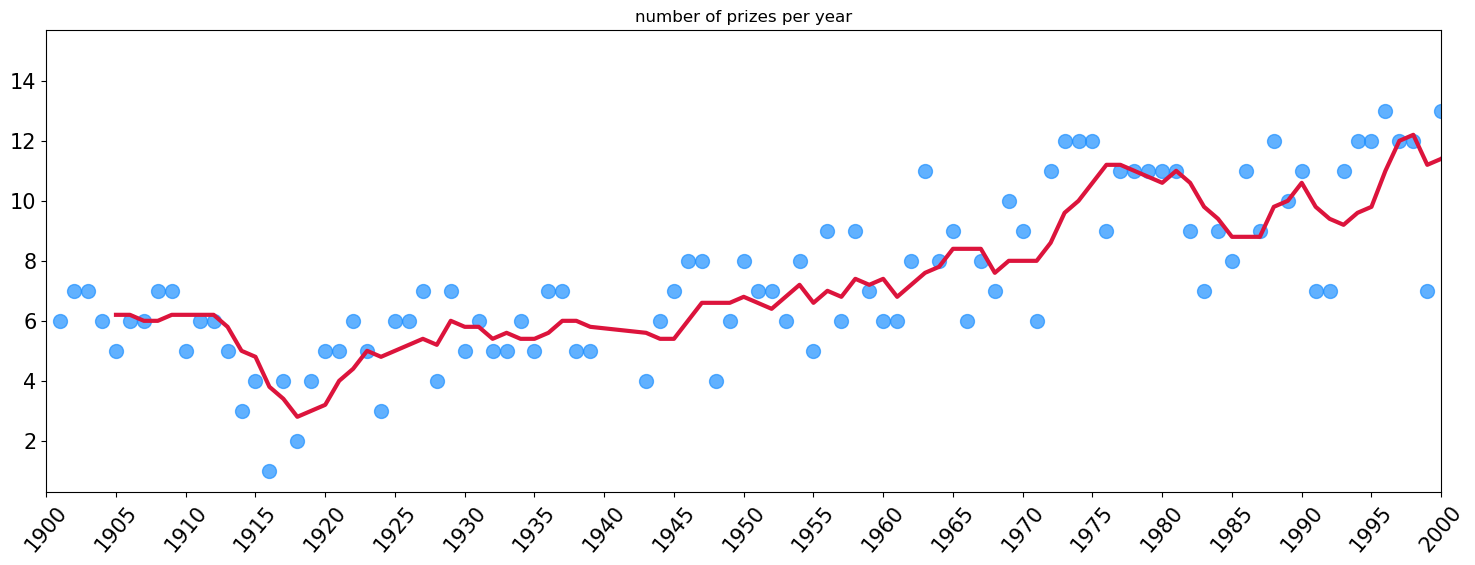

In [52]:
plt.figure(figsize=(18,6))
plt.title("number of prizes per year")
plt.xticks(ticks=np.arange(1900, 2021, 5), rotation=50, fontsize=15)
plt.yticks(fontsize=15)

ax= plt.gca()
ax.set_xlim(1900, 2000)

#year and prizes
scat_grp= plt.scatter(x=yearly_prizes.index, y=yearly_prizes.values, color="dodgerblue", s=100, alpha=0.7)

#year and prizes mean(avg for 5 years)
plt.plot(avg.index, avg.values, color="crimson", linewidth=3)

# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [53]:
#1
yearly_share= df_data.groupby("year").agg({"share_pct":pd.Series.mean})

In [54]:
#2
yearly_rol_share= yearly_share.rolling(window=5).mean()

In [55]:
yearly_rol_share

share_pct
year           
1901        NaN
1902        NaN
1903        NaN
1904        NaN
1905       0.82
...         ...
2016       0.52
2017       0.50
2018       0.50
2019       0.50
2020       0.49

[117 rows x 1 columns]

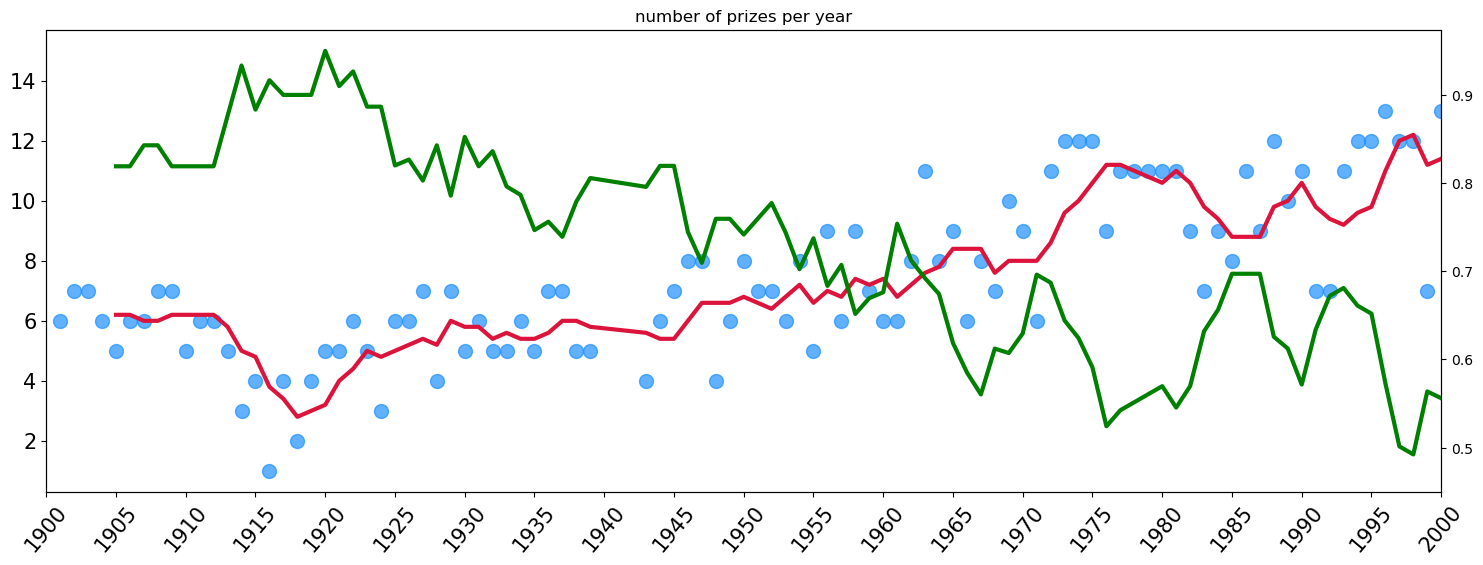

In [56]:
plt.figure(figsize=(18,6))
plt.title("number of prizes per year")
plt.xticks(ticks=np.arange(1900, 2021, 5), rotation=50, fontsize=15)
plt.yticks(fontsize=15)

ax= plt.gca()
ax.set_xlim(1900, 2000)
axx= ax.twinx()

#year and prizees
ax.scatter(x=yearly_prizes.index, y=yearly_prizes.values, color="dodgerblue", s=100, alpha=0.7)

#year and prizes mean(avg for 5 years)
ax.plot(avg.index, avg.values, color="crimson", linewidth=3)

#year and share-percent mean
axx.plot(yearly_rol_share.index, yearly_rol_share.values, color="g", linewidth=3)


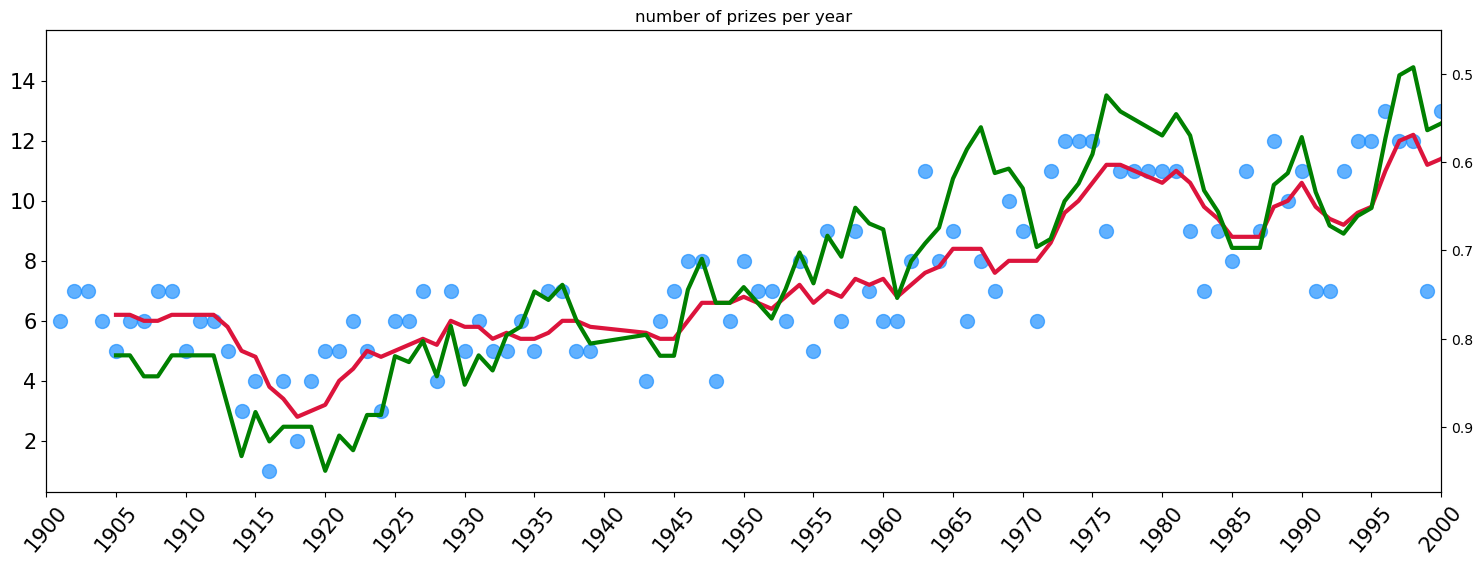

In [57]:
plt.figure(figsize=(18,6))
plt.title("number of prizes per year")
plt.xticks(ticks=np.arange(1900, 2021, 5), rotation=50, fontsize=15)
plt.yticks(fontsize=15)

ax= plt.gca()
ax.set_xlim(1900, 2000)
axx= ax.twinx()
axx.invert_yaxis()

ax.scatter(x=yearly_prizes.index, y=yearly_prizes.values, color="dodgerblue", s=100, alpha=0.7)

ax.plot(avg.index, avg.values, color="crimson", linewidth=3)

axx.plot(yearly_rol_share.index, yearly_rol_share.values, color="g", linewidth=3)


In [58]:
df_data[:5]

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   
2  "for his work on serum therapy, especially its...         1/1   
3                                                NaN         1/2   
4                                                NaN         1/2   

  laureate_type                     full_name birth_date         birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30          Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16              Paris   
2    Individual        Emil Adolf von Behring 1854-03-15  Hansdorf (Lawice)   
3    Individual                Frédéric Passy 1822-05-20              Paris   
4    Individual             Jean Henry Dunant 1828-05-08             Geneva   

      birth_country birth_country_current   sex   organization_name  \
0       Netherlands           Netherlands  Male   Berlin University   
1            France                France  Male                 NaN   
2  Prussia (Poland)                Poland  Male  Marburg University   
3            France                France  Male                 NaN   
4       Switzerland           Switzerland  Male                 NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00  
1               NaN                  NaN  FRA       1.00  
2           Marburg              Germany  POL       1.00  
3               NaN                  NaN  FRA       0.50  
4               NaN                  NaN  CHE       0.50

# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [59]:
top_20_countries= df_data.groupby(["birth_country_current"], as_index=False).agg({"prize":pd.Series.count})[:20]
top_20_countries.sort_values("prize", inplace=True)

In [60]:
plt.figure(figsize=(14,6))

bar= px.bar(top_20_countries,x="prize", y="birth_country_current", orientation="h", color="prize", color_continuous_scale="YlGnBu", title="Top 20 Countries by Number of Prizes")

bar.update_layout(coloraxis_showscale=False, xaxis_title="Number of Prizes", yaxis_title="country")


<Figure size 1400x600 with 0 Axes>

In [61]:
# top_20_countries

# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [62]:
df_country_data= df_data.groupby(["birth_country_current", "ISO"], as_index=False).agg({"prize":pd.Series.count})

In [63]:
world=px.choropleth(df_country_data, locations="ISO", color="prize", color_continuous_scale="matter", hover_name="birth_country_current")

world.show()

# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [64]:
cat_country=df_data.groupby(["birth_country_current", "category"], as_index=False).agg({"prize": pd.Series.count})

In [65]:
merged= pd.merge(cat_country, top_20_countries, on="birth_country_current")

In [66]:
merged.columns=["birth_country_current", "category", "cat_prize", "total_prize"]

In [67]:
merged= merged.sort_values("total_prize", ascending=False)

In [68]:
bar= px.bar(merged, y="birth_country_current", x="cat_prize",color="category" ,orientation="h")

bar.update_layout(xaxis_title="Number of Prizes", yaxis_title="Country")

bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [74]:
prize_by_year= df_data.groupby(["birth_country_current", "year"], as_index=False).count()

In [78]:
prize_by_year= prize_by_year.sort_values("year")[["year", 'birth_country_current', 'prize']]

In [87]:
cum_prizes= prize_by_year.groupby(by=["birth_country_current", "year"]).sum().groupby(level=[0]).cumsum()

In [88]:
cum_prizes.reset_index(inplace=True)

In [89]:
cum_prizes

birth_country_current  year  prize
0                     Algeria  1957      1
1                     Algeria  1997      2
2                   Argentina  1936      1
3                   Argentina  1947      2
4                   Argentina  1980      3
..                        ...   ...    ...
622  United States of America  2020    281
623                 Venezuela  1980      1
624                   Vietnam  1973      1
625                     Yemen  2011      1
626                  Zimbabwe  1960      1

[627 rows x 3 columns]

In [97]:
li_chart= px.line(cum_prizes, x="year", y="prize", color="birth_country_current", hover_name="birth_country_current")

li_chart.show()



# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

University of California                        40
Harvard University                              29
Stanford University                             23
Massachusetts Institute of Technology (MIT)     21
University of Chicago                           20
University of Cambridge                         18
Columbia University                             17
California Institute of Technology (Caltech)    17
Princeton University                            15
Max-Planck-Institut                             13
Rockefeller University                          13
University of Oxford                            12
MRC Laboratory of Molecular Biology             10
Yale University                                  9
Cornell University                               8
Bell Laboratories                                8
Institut Pasteur                                 7
Harvard Medical School                           7
London University                                7
Sorbonne University            

In [161]:
org_prize= df_data.groupby(["organization_name"], as_index=False).agg({"prize_share":pd.Series.count})

In [169]:
org_prize= org_prize.sort_values("prize_share")[:20]

In [170]:
org_prize

organization_name  prize_share
163                           Sorbonne University            7
79                               Institut Pasteur            7
192                     University College London            7
67                         Harvard Medical School            7
12                              Bell Laboratories            8
40                             Cornell University            8
258                               Yale University            9
111           MRC Laboratory of Molecular Biology           10
222                          University of Oxford           12
152                        Rockefeller University           13
119                           Max-Planck-Institut           13
146                          Princeton University           15
38                            Columbia University           17
26   California Institute of Technology (Caltech)           17
197                       University of Cambridge           18
198                         University of Chicago           20
117   Massachusetts Institute of Technology (MIT)           21
167                           Stanford University           23
68                             Harvard University           29
196                      University of California           40

In [171]:
bar= px.bar(org_prize, y="organization_name", x="prize_share", orientation="h",color_continuous_scale=px.colors.sequential.haline, color="prize_share", title="Top 20 Research Institutions by Number of Prizes")

bar.update_layout(xaxis_title="Number of Prizes",yaxis_title="Institutes", coloraxis_showscale=False)

bar.show()


In [172]:
df_data[:2]

year    category                               prize  \
0  1901   Chemistry   The Nobel Prize in Chemistry 1901   
1  1901  Literature  The Nobel Prize in Literature 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16      Paris   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   
1        France                France  Male                NaN   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00  
1               NaN                  NaN  FRA       1.00

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [182]:
x= df_data.groupby(["organization_city"], as_index=False).agg({"prize_share":pd.Series.count})

In [203]:
top_20_org_cities= df_data.organization_city.value_counts()[:20]
top_20_org_cities.sort_values( inplace=True)

In [206]:
bar= px.bar(y=top_20_org_cities.index, x=top_20_org_cities.values, color=top_20_org_cities.values ,orientation="h", title="zTop 20 Cities and Researches")

bar.update_layout(coloraxis_showscale=False, yaxis_title="city names", xaxis_title="prizes")

bar.show()

In [208]:
# top_20_org_cities

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [215]:
Top_birth_cities= df_data.birth_city.value_counts()[:20]
Top_birth_cities= Top_birth_cities.sort_values()

In [222]:
bar= px.bar(orientation="h", x=Top_birth_cities.values, y=Top_birth_cities.index, color=Top_birth_cities.values,color_continuous_scale="Plasma", title="Top 20 cities ")

bar.update_layout(coloraxis_showscale= False, xaxis_title="Prizes", yaxis_title="Cities")

bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [223]:
df_data[:1]

year   category                              prize  \
0  1901  Chemistry  The Nobel Prize in Chemistry 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00

In [228]:
data= df_data.groupby(["organization_country","organization_city", "organization_name"], as_index=False).agg({"prize_share":pd.Series.count})

In [231]:
data

organization_country     organization_city  \
0                   Argentina          Buenos Aires   
1                   Argentina          Buenos Aires   
2                   Australia              Canberra   
3                   Australia             Melbourne   
4                   Australia              Nedlands   
..                        ...                   ...   
286  United States of America    West Lafayette, IN   
287  United States of America        Wilmington, DE   
288  United States of America        Woods Hole, MA   
289  United States of America         Worcester, MA   
290  United States of America  Yorktown Heights, NY   

                                     organization_name  prize_share  
0                   Institute for Biochemical Research            1  
1    Instituto de Biologia y Medicina Experimental ...            1  
2                       Australian National University            1  
3    Walter and Eliza Hall Institute for Medical Re...            1  
4    NHMRC Helicobacter pylori Research Laboratory,...            1  
..                                                 ...          ...  
286                                  Purdue University            2  
287                                            Du Pont            1  
288                 Marine Biological Laboratory (MBL)            1  
289         University of Massachusetts Medical School            1  
290               IBM Thomas J. Watson Research Center            1  

[291 rows x 4 columns]

In [238]:
sb= px.sunburst(data,path=["organization_country", "organization_city", "organization_name"], values="prize_share", title="All the Discoveries")
sb.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [239]:
df_data[:1]

year   category                              prize  \
0  1901  Chemistry  The Nobel Prize in Chemistry 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   

  organization_city organization_country  ISO  share_pct  
0            Berlin              Germany  NLD       1.00

In [241]:
birth_year= df_data.birth_date.dt.year

In [249]:
df_data["winning_age"]= df_data.year - birth_year

In [251]:
df_data[:2]

year    category                               prize  \
0  1901   Chemistry   The Nobel Prize in Chemistry 1901   
1  1901  Literature  The Nobel Prize in Literature 1901   

                                          motivation prize_share  \
0  "in recognition of the extraordinary services ...         1/1   
1  "in special recognition of his poetic composit...         1/1   

  laureate_type                     full_name birth_date birth_city  \
0    Individual  Jacobus Henricus van 't Hoff 1852-08-30  Rotterdam   
1    Individual               Sully Prudhomme 1839-03-16      Paris   

  birth_country birth_country_current   sex  organization_name  \
0   Netherlands           Netherlands  Male  Berlin University   
1        France                France  Male                NaN   

  organization_city organization_country  ISO  share_pct  winning_age  
0            Berlin              Germany  NLD       1.00        49.00  
1               NaN                  NaN  FRA       1.00        62.00

### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [260]:
#youngest
df_data.loc[df_data.winning_age.idxmin()]

year                                                                  2014
category                                                             Peace
prize                                           The Nobel Peace Prize 2014
motivation               "for their struggle against the suppression of...
prize_share                                                            1/2
laureate_type                                                   Individual
full_name                                                 Malala Yousafzai
birth_date                                             1997-07-12 00:00:00
birth_city                                                         Mingora
birth_country                                                     Pakistan
birth_country_current                                             Pakistan
sex                                                                 Female
organization_name                                                      NaN
organization_city        

In [262]:
#oldest
df_data.loc[df_data.winning_age.idxmax()]

year                                                               2019
category                                                      Chemistry
prize                                 The Nobel Prize in Chemistry 2019
motivation               “for the development of lithium-ion batteries”
prize_share                                                         1/3
laureate_type                                                Individual
full_name                                               John Goodenough
birth_date                                          1922-07-25 00:00:00
birth_city                                                         Jena
birth_country                                                   Germany
birth_country_current                                           Germany
sex                                                                Male
organization_name                                   University of Texas
organization_city                                             Au

In [263]:
#avg
df_data.winning_age.mean()

59.94860813704497

In [264]:
#75%
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

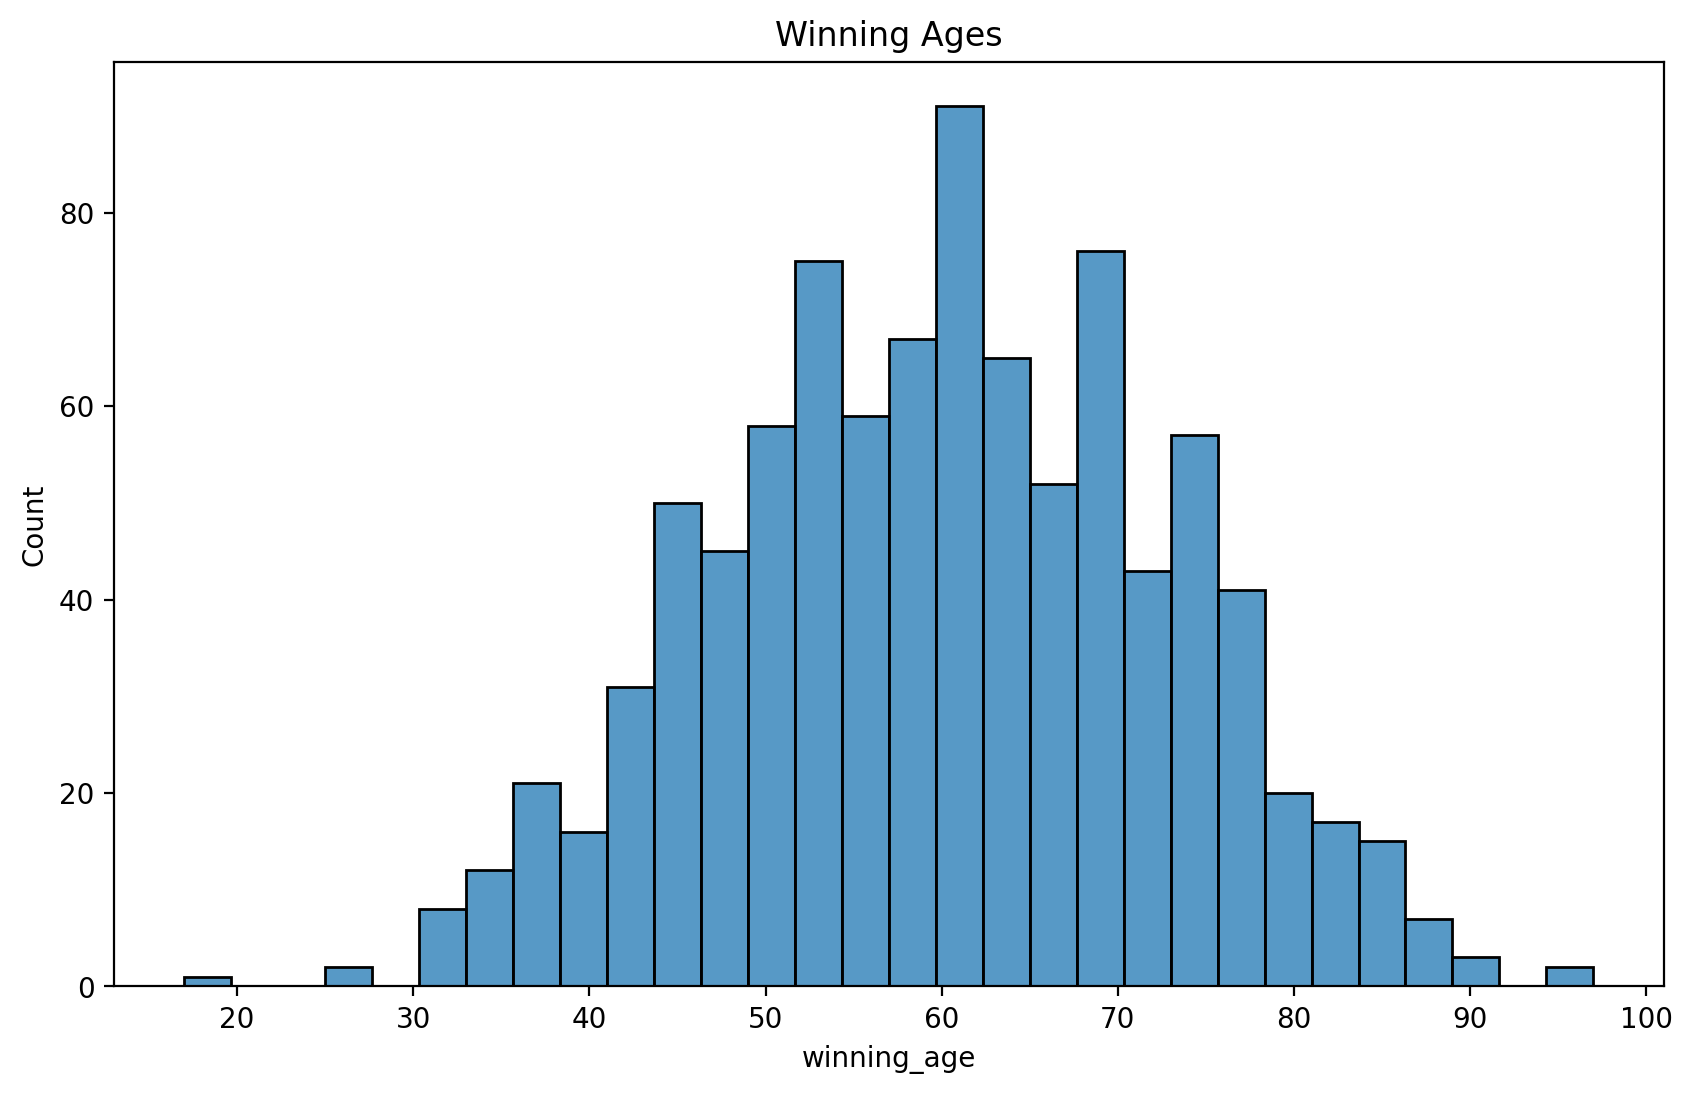

In [303]:
import seaborn as sns

plt.figure(figsize=(10,6), dpi=200)
sb= sns.histplot(df_data, x="winning_age", bins=30)

plt.title("Winning Ages")
plt.show()

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [306]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

In [307]:
#above graph

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


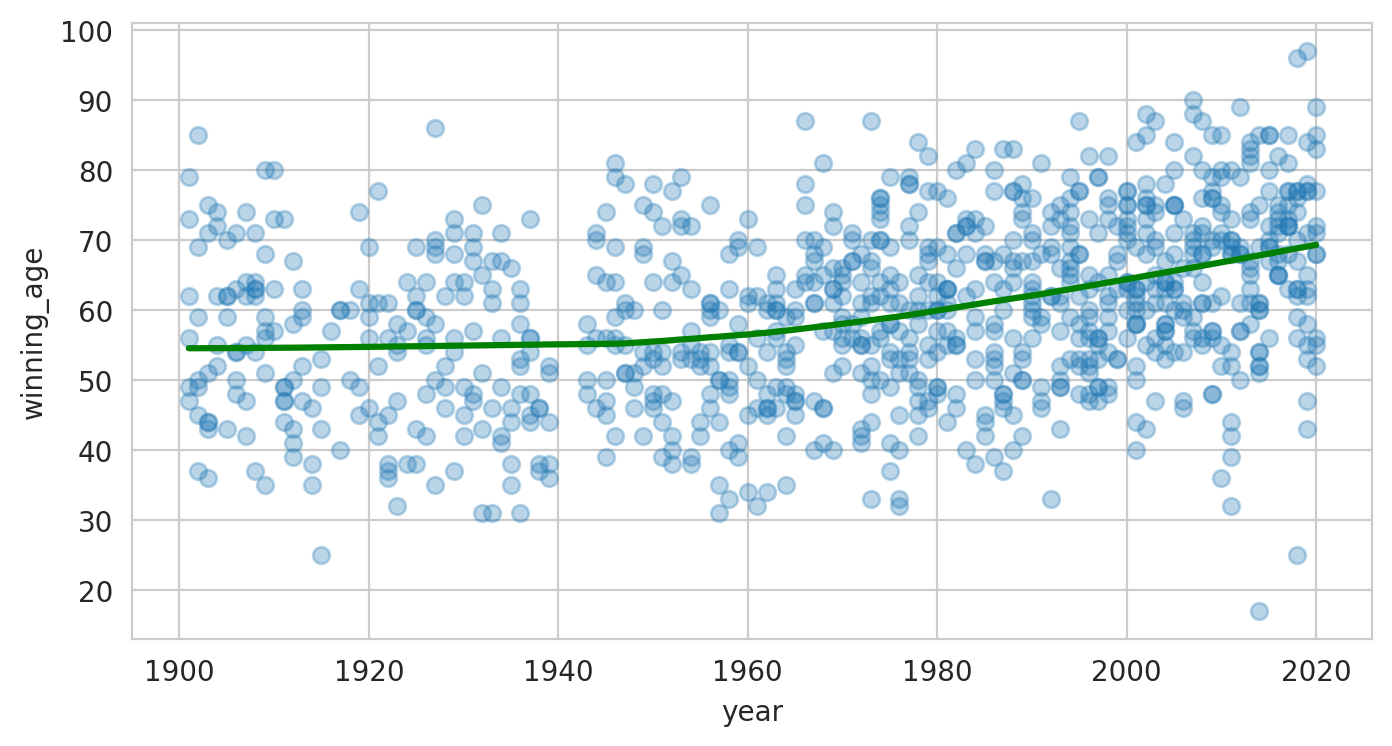

In [336]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(df_data, x="year", y="winning_age", lowess=True, scatter_kws={"alpha":.3}, line_kws={"color":"green"})

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

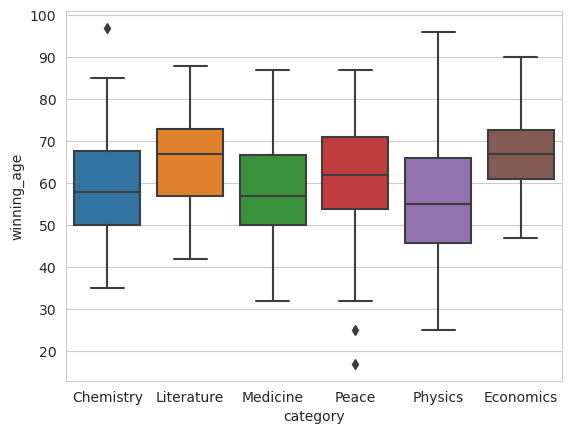

In [337]:
with sns.axes_style("whitegrid"):
    sns.boxplot(df_data, x="category", y="winning_age")

**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


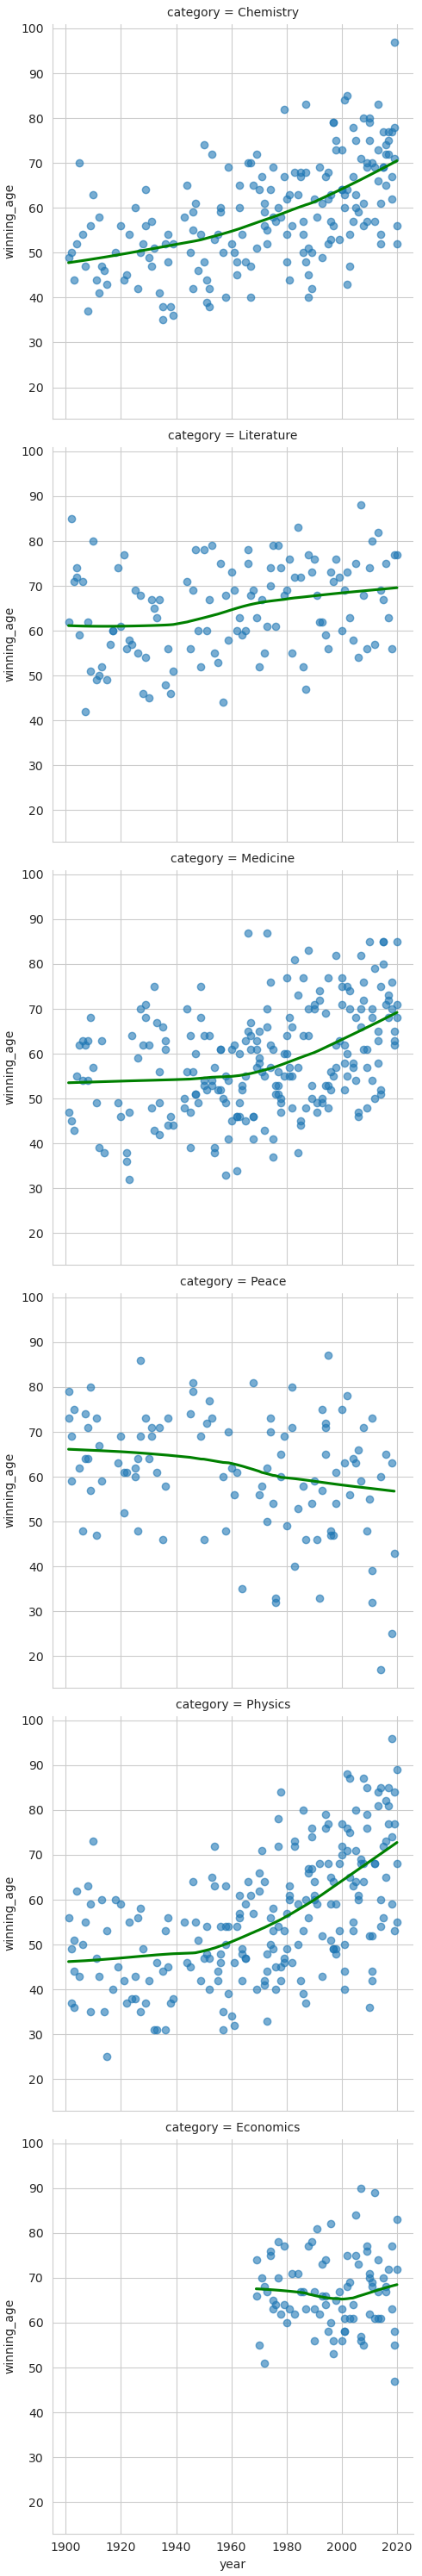

In [340]:
with sns.axes_style("whitegrid"):
    sns.lmplot(df_data, x= "year", y="winning_age", row= "category", lowess=True, scatter_kws={"alpha":0.6}, line_kws= {"color":"green"})

In [ ]:
#3
#chemistry has highest
#peace has lowest

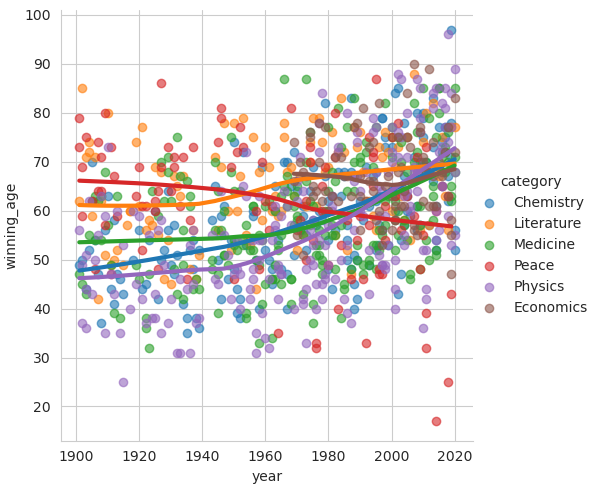

In [345]:
with sns.axes_style("whitegrid"):
    sns.lmplot(df_data, x= "year", y="winning_age",hue="category", lowess=True, scatter_kws={"alpha":0.6}, line_kws= {"linewidth":3})